In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

from datetime import datetime as dt
import datetime

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader

In [ ]:
# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

In [ ]:
###STOCK DATA NEURAL NETWORK!!!!! FTW!!
dataLocation = ("/content/drive/MyDrive/HighVolumeStocks")

In [ ]:
TradeList = []
LSTM_data = []
classes = False
for file in tqdm(files):
  if file.is_file() and file.name !='.DS_Store':
    data = pd.read_csv(file)
  
    date = file.name[-14:-4]
    dayOfMonth = str(date)[8:10]
    month = str(date)[5:7]
    year = str(date)[0:4]
    ts = pd.Timestamp(int(year), int(month), int(dayOfMonth), 9,30,0)
    data['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')
    target1 = float(data['target'].head(1))

    target = data[data['time'] > ts]['close']
    data = data[data['time'] <= ts]
    data = data.drop(['target','time','Unnamed: 0'],axis=1)

    
    x = torch.transpose(df_to_tensor(data),0,1)#.flatten() # flatten the data for linear layers


    
    if target1 < 2:
      target = torch.Tensor(sorted(target))
      
      TradeList.append((x.flatten(), target))
    else:
      print(target)


NameError: ignored

In [ ]:
## LSTM DATA LOADER
files = os.scandir(dataLocation)
LSTM_data = []
for file in tqdm(files):
  if file.is_file() and file.name !='.DS_Store':

    data_lstm = pd.read_csv(file)  
    N = len(data_lstm)
    start = data_lstm['time'].tail(1)
    #ts = pd.Timestamp(int(year), int(month), int(dayOfMonth),4,0,0)
    #data_lstm['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')
    #data_lstm = data_lstm[data_lstm['time'] <= ts]
    data_lstm = data_lstm.drop(['target','time','Unnamed: 0'],axis=1)

    ##grab chucks of lstm
    lstm_states = []
    lstm_targets = []
    for i in range(N//30):
      target_lstm = data_lstm.iloc[-i-30:-i]['close'].sum()
      state = data_lstm.iloc[-i-60:-i-30]
      state_next = data_lstm.iloc[-i-30:-i]
      if len(state)==0:
        print(data_lstm)
      if len(state!=30):
        x = torch.transpose(df_to_tensor(state),0,1).flatten()
        lstm_states.append(x)
        lstm_targets.append(target_lstm)
      
    LSTM_data.append((lstm_states, lstm_targets, state_next))


3918it [47:52,  1.36it/s]


In [ ]:
input_size = len(x.flatten())
input_size

In [ ]:
len(target)

629

In [ ]:
x.shape
print(input_size)

330


In [ ]:
class LinearNetwork(nn.Module):
  
  def __init__(self, input_dims=input_size, output_dims=1, dropout=0.2):
    super(LinearNetwork, self).__init__()
    self.fc1 = nn.Linear(input_dims, 16384)
    self.fc2 = nn.Linear(16384, 16384)
    self.fc3 = nn.Linear(16384, 8192)
    self.fc4 = nn.Linear(8192, 4096)
    self.fc5 = nn.Linear(4096, 2048)
    self.fc6 = nn.Linear(2048, 1024)
    self.fc7 = nn.Linear(1024, 512)
    self.fc8 = nn.Linear(512, 390)

  def forward(self, x):
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.tanh(self.fc3(x))
    x = F.tanh(self.fc4(x))
    x = F.tanh(self.fc5(x))
    x = F.tanh(self.fc6(x))
    x = F.tanh(self.fc7(x))
    x =  self.fc8(x) # self.fc4(torch.transpose(x,1,2))
    
    return x

In [ ]:
class LinearNetwork(nn.Module):
  def __init__(self, input_dims=input_size, output_dims=1, dropout=0.2):
    super(LinearNetwork, self).__init__()
    self.fc1 = nn.Linear(input_dims, 16384)
    self.fc2 = nn.Linear(16384, 16384)
    self.fc3 = nn.Linear(16384, 8192)
    self.fc4 = nn.Linear(8192, 4096)
    self.fc5 = nn.Linear(4096, 2048)
    self.fc6 = nn.Linear(2048, 1024)
    self.fc7 = nn.Linear(1024, 512)
    self.fc8 = nn.Linear(512, 1)

  def forward(self, x):
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.tanh(self.fc3(x))
    x = F.tanh(self.fc4(x))
    x = F.tanh(self.fc5(x))
    x = F.tanh(self.fc6(x))
    x = F.tanh(self.fc7(x))
    x =  self.fc8(x) # self.fc4(torch.transpose(x,1,2))
    
    return x

In [ ]:
class LinearNetwork(nn.Module):
  def __init__(self, input_dims=input_size, output_dims=1, dropout=0.2):
    super(LinearNetwork, self).__init__()
    self.fc1 = nn.Linear(input_dims, 16384)
    self.fc2 = nn.Linear(16384, 16384)
    self.fc3 = nn.Linear(16384, 8192)
    self.fc4 = nn.Linear(8192, 4096)
    self.fc5 = nn.Linear(4096, 2048)
    self.fc6 = nn.Linear(2048, 1024)
    self.fc7 = nn.Linear(1024, 512)
    self.fc8 = nn.Linear(512, 1)

  def forward(self, x):
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.tanh(self.fc3(x))
    x = F.tanh(self.fc4(x))
    x = F.tanh(self.fc5(x))
    x = F.tanh(self.fc6(x))
    x = F.tanh(self.fc7(x))
    x =  self.fc8(x) # self.fc4(torch.transpose(x,1,2))
    
    return x

In [ ]:
class ConvNetwork(nn.Module):
  def __init__(self, out_dim = 1):
    super(ConvNetwork, self).__init__()
    x, y = dataset[0]
    c, h = x.size()
    in_dim = c*h
    self.net = nn.Sequential(
        nn.Conv2d(c, 8, (3,3), padding=(1,1), strategy ='xavier'),
        nn.ReLU(),
        nn.Conv2d(8 , 20, (5,5), padding=(2,2), strategy ='xavier'),
        nn.ReLU(),
        nn.Conv2d(20 , 20, (7,7), padding=(3,3), strategy ='xavier'),
        nn.ReLU(),
        nn.Conv2d(20 , 200, (3,3), padding=(1,1), strategy ='xavier'),
        nn.ReLU(),
        nn.Conv2d(200, out_dim,(28,28), padding=(0,0),  strategy ='xavier'),
    )

  def forward(self, x):
    return self.net(x).squeeze(2).squeeze(2)

In [ ]:
class PatternDetection(nn.Module):
  def __init__(self, in_dim=2, classes = 1):
    super(PatternDetection, self).__init__()
    s_len=1
    conv_start = 4
    self.block1 = nn.Sequential(
        nn.Conv1d(1, conv_start, kernel_size = 3,stride=s_len, padding = 1),
        nn.ReLU(),
        nn.Conv1d(conv_start, conv_start,kernel_size = 3,stride=s_len,  padding = 1),
        nn.ReLU()
    )
    ###final output layer 
    self.Pred = nn.Linear(in_dim, 1)
    self.blocksN = torch.nn.ModuleList()
    self.blocksO1 = torch.nn.ModuleList()
    self.blocksO2 = torch.nn.ModuleList() 
    self.finalLayer = nn.Conv1d(conv_start,629, kernel_size=1, stride=1).cuda()
    n = conv_start
    for i in range(4):
      block =  nn.Sequential(
          nn.MaxPool1d(kernel_size=2, stride=1, padding=0),
          nn.Conv1d(n,n*2,kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU(),
          nn.Conv1d(n*2,n*2,kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU()
      ).cuda()
      n = n*2
      self.blocksN.append(block)

 
    for i in range(4):
      n = n
      n2 = int(n/2)
      #print(n)
      
      mod = nn.ConvTranspose1d(n, n2, kernel_size=2, stride=1, padding=0).cuda()
      self.blocksO1.append(mod)
      
      block =  nn.Sequential(
          nn.Conv1d(n, n2, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU(),
          nn.Conv1d(n2, n2, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU()
          #nn.dropout()
      ).cuda()
      n = n2
      self.blocksO2.append(block)

 
  def forward(self, x):
    ###going Down
    block1_out = self.block1(x)
    #print('block1', block1_out.shape)
    block2_out = self.blocksN[0](block1_out)
    #print('block2', block2_out.shape)

    block3_out = self.blocksN[1](block2_out)
    block4_out = self.blocksN[2](block3_out)
    block5_out = self.blocksN[3](block4_out)
    #print(self.blocksO1[0])
    ###going up
    #print(block4_out.shape,self.blocksO1[0](block5_out).shape )
    #print(torch.cat((block4_out, self.blocksO1[0](block5_out)), dim=2).shape)
    block6_out = self.blocksO2[0](torch.cat((block4_out, self.blocksO1[0](block5_out)),dim=1))
    #print('block6', block6_out.shape)
    block7_out = self.blocksO2[1](torch.cat((block3_out, self.blocksO1[1](block6_out)),dim=1))
    #print('block7', block7_out.shape)
    block8_out = self.blocksO2[2](torch.cat((block2_out, self.blocksO1[2](block7_out)),dim=1))
    block9_out = self.blocksO2[3](torch.cat((block1_out, self.blocksO1[3](block8_out)),dim=1))
    block10_out = self.finalLayer(block9_out)

    #print(block10_out.shape)
    return self.Pred(block10_out)

In [ ]:
class MSELoss(nn.Module):
  def __init(self, size_average=None, reduce=None, reduction='mean'):
    self.__dict__.update(locals())
    super(MSELoss, self).__init__()

  def forward(self, y_hat,y_truth):
    loss = torch.mean((y_hat - y_truth)**2 + (.0001/y_hat)**2)

    return loss

In [ ]:
class SelfAttention(nn.Module):
  def __init__(self, embed_size, heads):
    super(SelfAttention, self).__init()
    self.embed_size = embed_size
    self.heads = heads
    self.head_dim = embed_size //heads

    assert(self.head_dim * heads == embed_size)
    self.values = nn.Linear(self.heads, self.head_dim, bias =False)
    self.keys = nn.Linear(self.heads, self.head_dim, bias =False)
    self.quiries = nn.Linear(self.heads, self.head_dim, bias =False)
    self.fc_out =  nn.Linear(embed_size, embed_size, bias =False)


def forward(self,values, keys, query, mask):
  N = query.shape[0]
  value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]
  values = values.reshape(N, value_len, self.heads, self.head_dim)
  keys = keys.reshape(N, keys_len, self.heads, self.head_dim)
  queries = queries.reshape(N, queries_len, self.heads, self.head_dim)

  energy = torch.einsum('nqhd,nqhd->nhqk', [queries,keys])

  if mask is not None:
    energy = energy.masked_fill(mask==0, float('-1e20'))
  attention = torch.softmax(energy / (self.embed_size**.5), dim=3)
  out = torch.einsum('nhql,nlhd->nqhd')




In [ ]:
class Q_network(nn.Module):
  def __init__(self, input_size, hidden_size, output_size = 2, n_layers=3):
    ## actions are buy
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    self.GRU = nn.GRU(input_size, hidden_size, n_layers).cuda()
    self.embedding =  nn.Linear(hidden_size, output_size).cuda() ##nn.Embedding(output_size, hidden_size)
    self.out = nn.Linear(hidden_size, output_size).cuda()
    self.softmax = nn.LogSoftmax(dim=1).cuda()

  def forward(self, state, hidden):
    ## state is candlesticks (vector of candles charts), Cash, How much we are invested (vector)
    ## takes in the current state -> Expected value of actions 
    # by reviewing the documentation, construct a forward function that properly uses the output of the GRU
    #output = self.embedding(input_sequnce)
    output = F.relu(state)
    out_decoded, hidden = self.GRU(output, hidden)
    out_decoded = self.out(out_decoded)

    return out_decoded.squeeze(), hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size).cuda()

In [ ]:
train, test = train_test_split(TradeList, test_size=0.2, shuffle = False, stratify = None)


In [ ]:
def Q_learning(Q_eval, Q_target,s,pct_change,s_n, B, update_s, update_number,optim, objective, hidden_eval, hidden_target):
  optim.zero_grad()
  ## clip action so that you cant go higher or lower then the amount of cash you have 
  a, value = Q_eval(s, hidden_eval)
  y_hat = value
  ## update cash invested
  s_n[-1] += a
  s_n[-2] -= a


  y_truth = pct_change*(s[-1] + a) + Q_target(s_n, hidden_target)[1]*B
  loss = objective(y_hat,_y_truth)
  loss.backward()
  optim.step(loss)

  if update_s % update_number ==0:
      Q_target.load_state_dict(q_eval.state_dict())


  return s_n[-1], s_n[-2], loss.item()


In [ ]:
def train_lstm_Q_learning(s,s_n, target, cur_cash, cur_stock):

  hidden = rnn.init_hidden()


  return cur_cash, cur_stock, loss

In [ ]:
input_size, hidden_size, output_size = 330+2,330+2, 2
learning_rate = 0.001
optim = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
objective = nn.MSELoss()
update_number = 600
num_epochs = 2



def train():
  Equity_Cash = 10**6
  Equity_Stocks = 0 

  Q_eval = Q_network(input_size, hidden_size, output_size)
  Q_target = Q_network(input_size, hidden_size, output_size)
  
  B = .96
  update_it = 0 
  for s, pct_change, s_n in train_loader:
      loss = 0
      update_it +=1
      hidden_eval = Q_network.init_hidden()
      hidden_target = Q_network.init_hidden()
      for i in range(len(inp)): 
          s[i].append(cur_cash)
          s[i].append(cur_stock)
          s_n[i].append(cur_cash)
          s_n[i].append(cur_stock)
          cur_cash, cur_stock, loss_single = Q_learning(Q_eval, Q_target, s[i].unsqueeze(1).cuda(), pct_change,s_n[i].unsqueeze(1).cuda(),
                                                     B, update_it, update_number,optim, objective, hidden_eval, hidden_target)
      
      loss+=loss_single


In [ ]:

print(len(test))
print(len(train))

24
94


In [ ]:
train, test = train_test_split(LSTM_data, test_size=0.2, shuffle = False, stratify = None)



In [ ]:
train_loader = DataLoader(train, batch_size=12)
validation_loader = DataLoader(test, batch_size=12)

In [ ]:
torch.cuda.empty_cache()

model = PatternDetection(input_size, 629)
model = model.cuda()

optimizer = optim.SGD(params=model.parameters(), lr=1e-9)
objective = nn.MSELoss()

train_losses = [] 
validation_losses = [] 
num_epochs = 2

In [ ]:
### train the optimizer for GRU
input_size, hidden_size, output_size = 330,330, 1
learning_rate = 0.001
rnn = RNN(input_size, hidden_size, output_size)
decoder_optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
objective = nn.MSELoss()
loss_avg = 0
print_every = 1

In [ ]:


def train_lstm(inp, target):
  decoder_optimizer.zero_grad()
  hidden = rnn.init_hidden()
  loss = 0
  for i in range(len(inp)): 
      output, hidden = rnn(inp[i].unsqueeze(1).cuda(), hidden)
      if i > 20:
        loss += objective(output.float(), target[i].float().cuda()).float()
  loss.backward()
  decoder_optimizer.step()
  return  loss.item()




for epoch in range(1, num_epochs + 1):
  ###input is 30 minute chunks of data
  for x, y_truth in train_loader:

    loss_ = train_lstm(x,y_truth)    
    loss_avg += loss_


    


      

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
def evaluate(inp, target):
  hidden = rnn.init_hidden()
  loss = 0
  loss1_list = []
  loss2_list = []
  for i in range(len(inp)): 
      output, hidden = rnn(inp[i].unsqueeze(1).cuda(), hidden)
      if i > 20:
          loss1 = torch.mean(output.float()**2-target[i].float().cuda()**2)**.5
          ## relized gains if you long positive expected value and short negative 
          output = torch.Tensor([1 if i >0 else -1 for i in output]).float()
          loss2 = torch.mean(output*target[i]).item() - torch.mean(torch.Tensor([1 for i in range(len(output))]).float()*target[i]).item()
          loss1_list.append(loss1.item())
          loss2_list.append(loss2)
  return loss1_list, loss2_list

In [ ]:
  for x, y_truth in validation_loader:
    print(y_truth)
    loss1, loss2 = evaluate(x, y_truth)
    #print(loss1, loss2)

Streaming output truncated to the last 5000 lines.
         0.0000e+00,  0.0000e+00], dtype=torch.float64), tensor([ 1.5316e-04, -8.0295e-04, -7.9026e-04, -6.7075e-04, -8.5151e-05,
        -1.9981e-04,  6.4285e-04, -5.4815e-04, -7.3108e-05, -4.4614e-03,
         0.0000e+00,  0.0000e+00], dtype=torch.float64), tensor([ 1.5316e-04, -1.7180e-03, -7.9026e-04,  1.3692e-03, -8.5151e-05,
        -1.9981e-04,  7.2285e-04, -5.4815e-04,  9.7736e-07, -3.0984e-03,
         0.0000e+00,  0.0000e+00], dtype=torch.float64), tensor([-6.1043e-04, -1.8589e-03, -7.9026e-04,  8.7682e-04, -8.5151e-05,
        -1.9981e-04,  6.4273e-04, -5.4815e-04,  7.5068e-05, -5.7915e-03,
         0.0000e+00,  0.0000e+00], dtype=torch.float64), tensor([-6.1043e-04, -2.4570e-03, -7.9026e-04,  2.7698e-03, -2.5682e-04,
        -1.9981e-04, -4.8014e-04, -5.4815e-04, -7.3108e-05, -5.5574e-03,
         0.0000e+00,  0.0000e+00], dtype=torch.float64), tensor([-0.0006, -0.0004, -0.0008,  0.0012, -0.0002, -0.0002, -0.0006, -0.0005,


In [ ]:
print(np.sum(loss2))
print(np.mean(loss2))
print(len(loss2))

0.0
0.0
64


In [ ]:
loss2_list

NameError: ignored

In [ ]:
train_loader

In [ ]:
pred_act = []
weirdData = []
for epoch in tqdm(range(num_epochs)): 
  # train

  batch = 0

  for x, y_truth in train_loader:

    x, y_truth = x.cuda(non_blocking=True), y_truth.float().cuda(non_blocking=True)

    optimizer.zero_grad()
    total_norm = 0
    
    
    y_hat = model(x.unsqueeze(1)).squeeze()
    #print(y_hat.shape, y_truth.shape)
    loss = objective(y_hat, y_truth)
    train_losses.append(float(loss.item()))
    # print(loss.item())
    loss.backward()
    optimizer.step()
    if loss > 100:
      weirdData.append(x.detach())
      """
      print('predicted')
      print(y_hat)
      print('actual')
      print(y_truth)
      """
   
    if batch % 30 == 0:
      model.eval()
      validation_loss_list = []

      for val_x, val_Y in validation_loader:
        val_x, val_y_truth = val_x.cuda(non_blocking=True), val_Y.float().cuda(non_blocking=True)
        val_y_hat = model(val_x.unsqueeze(1)).squeeze()
        #print(val_y_hat.shape, val_y_truth.shape)
        v_loss = objective(val_y_hat, val_y_truth)
        validation_loss_list.append(v_loss.item())
        print(v_loss)
      #print("validation loss: ", np.mean(validation_loss_list))
      validation_losses.append(np.mean(validation_loss_list))
      
      
      model.train()
    batch +=1
   
   


  0%|          | 0/10 [00:00<?, ?it/s]

tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0530, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5046, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=

 10%|█         | 1/10 [00:29<04:23, 29.23s/it]

tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5034, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=

 20%|██        | 2/10 [00:58<03:55, 29.48s/it]

tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5023, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=

 30%|███       | 3/10 [01:28<03:25, 29.32s/it]

tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5013, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=

 40%|████      | 4/10 [01:57<02:55, 29.24s/it]

tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5003, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=

 50%|█████     | 5/10 [02:26<02:25, 29.20s/it]

tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.4994, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=

 60%|██████    | 6/10 [02:55<01:56, 29.20s/it]

tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.4985, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=

 70%|███████   | 7/10 [03:24<01:27, 29.18s/it]

tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.4978, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=

 80%|████████  | 8/10 [03:54<00:59, 29.54s/it]

tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.4970, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=

 90%|█████████ | 9/10 [04:25<00:29, 29.97s/it]

tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.4964, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=

100%|██████████| 10/10 [04:56<00:00, 29.64s/it]


In [ ]:
# print(pd.DataFrame(weirdData[-12].squeeze(0).cpu().numpy()))
x = torch.ones(21131).cuda()


In [ ]:
#
val_y_hat, val_y_truth, len(val_x)

(tensor([[ 0.1102, -0.0029, -0.2951,  ...,  0.0929, -0.1045,  0.0287],
         [ 0.1149,  0.0231, -0.3514,  ...,  0.0732, -0.0877,  0.0124],
         [ 0.1054,  0.0273, -0.3285,  ...,  0.0672, -0.0847,  0.0112]],
        device='cuda:0', grad_fn=<SqueezeBackward0>),
 tensor([[-0.0028, -0.0022, -0.0019,  ...,  0.0021,  0.0021,  0.0031],
         [-0.0074, -0.0069, -0.0065,  ...,  0.0136,  0.0154,  0.0171],
         [-0.0109, -0.0070, -0.0069,  ...,  0.0066,  0.0073,  0.0102]],
        device='cuda:0'),
 3)

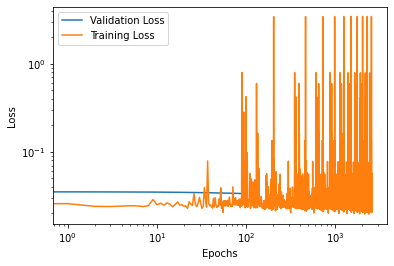

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(range(len(validation_losses)), validation_losses, label= "Validation Loss")
ax.loglog(range(len(train_losses)), train_losses, label = "Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred_act = []
for val_x, val_Y in validation_loader:

  val_x, val_y_truth = val_x.cuda(non_blocking=True), val_Y.float().cuda(non_blocking=True)
  val_y_hat = model(val_x.unsqueeze(1)).squeeze(1)
  for p, a in zip(val_y_hat, val_y_truth):
    pred_act.append((p.item(),a.item()))
  v_loss = objective(val_y_hat, val_y_truth)
  validation_loss_list.append(v_loss.item())


NameError: ignored

In [ ]:
pred, act = zip(*pred_act)
xt, yt = zip(*TradeList)

In [ ]:
pred_act

In [ ]:
print(np.mean(act)) ### mean of actual
print(np.mean(yt)) ### mean of training 
np.mean(pred)     ### mean of pred

In [ ]:
####Test to see if there is any alpha is in 
t_mean = np.mean(yt)
output_loss = 0
mean_loss = 0
n= len(pred_act)
for pred, act in pred_act:
  output_loss += np.abs(pred-act)
  mean_loss += np.abs(t_mean-act)
print('output prediction vs a mean of training prediction')
print(output_loss/n, mean_loss/n)

thresh_strat_loss = []
cnt=0
for pred, act in pred_act:
  if pred > .000000:
    thresh_strat_loss.append(act)
    cnt+=1
  if pred < -.000000:
    thresh_strat_loss.append(-act)
    cnt+=1
print('actual returns on nuearl net')
print(np.mean(thresh_strat_loss))
print('length, STDEV,  then STDV OF ACTUAL')
print(len(thresh_strat_loss))
print(np.std(thresh_strat_loss))
print(np.std(np.array(pred_act)[:,1]))
np.mean(np.array(pred_act)[:,1])




In [ ]:
### output for other U-net prediction 1
output prediction vs a mean of training prediction
0.03557109566839037 0.0258922995412636
actual returns on nuearl net
-0.004333998685326376
length, STDEV,  then STDV OF ACTUAL
783
0.051896527522233636
-0.0018511359895394264
###output for other Unet 2
output prediction vs a mean of training prediction
0.04810138336826389 0.0258922995412636
actual returns on nuearl net
0.0009741550316092395
length, STDEV,  then STDV OF ACTUAL
783
0.052068072131055076
-0.0018511359895394264
## output 3 
output prediction vs a mean of training prediction
0.027584465001511273 0.0258922995412636
actual returns on nuearl net
0.001064475799911765
length, STDEV,  then STDV OF ACTUAL
783
0.052066303928181484
-0.0018511359895394264
##out put 4 5 epochs 
output prediction vs a mean of training prediction
0.03561749565363047 0.0258922995412636
actual returns on nuearl net
-0.00010107576231249772
length, STDEV,  then STDV OF ACTUAL
783
0.05207708610474127
-0.0018511359895394264
### output 5 10 epochs learning 5
output prediction vs a mean of training prediction
0.02614295805232688 0.0258922995412636
actual returns on nuearl net
0.0012714796159545788
length, STDEV,  then STDV OF ACTUAL
783
0.052061660106613734
-0.0018511359895394264

In [ ]:
#linear layer out put for time split getmentation

output prediction vs a mean of training prediction
0.02591754019067942 0.0258922995412636
actual returns on nuearl net
0.0018673384617182984
length, STDEV,  then STDV OF ACTUAL
783
0.05204369472414263
-0.0018511359895394264

In [ ]:

output prediction vs a mean of training prediction
0.028227262848799055 0.023557752120384384
actual returns on nuearl net
0.0022024756120095604
length, STDEV,  then STDV OF ACTUAL
783
0.04166994251570694
-0.0031996590362538824

In [ ]:
output prediction vs a mean of training prediction
0.026771486175200743 0.023557752120384384
actual returns on nuearl net
0.0028029932544000524
length, STDEV,  then STDV OF ACTUAL
783
0.04163385926021758
-0.0031996590362538824

In [ ]:
output prediction vs a mean of training prediction
0.0285287712380114 0.023557752120384384
actual returns on nuearl net
0.001987438573707775
length, STDEV,  then STDV OF ACTUAL
783
0.041680752104533286
-0.0031996590362538824

In [ ]:
output prediction vs a mean of training prediction
0.028367617817852516 0.023557752120384384
actual returns on nuearl net
0.0019744115653846264
length, STDEV,  then STDV OF ACTUAL
783
0.041681371223297015
-0.0031996590362538824